In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pre_process import preProcessor

In [26]:
def clean_data(df):
    # Remove rows with missing values
    df = df.dropna()

    # Detect and remove outliers using IQR
    for col in ['age', 'bmi', 'charges']:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        
        # print(f"Column: {col}")
        # print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")
        # print(f"Rows before filtering: {len(df)}")

        # Filter out outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

        # Debug print statement
        # print(f"Rows after filtering: {len(df)}")
    df = df.reset_index(drop=True)
    return df

In [27]:


def histogram(df):
    # Create a figure with subplots
    plt.figure(figsize=(15, 5))

    # Histogram for 'age'
    plt.subplot(1, 3, 1)  # 1 row, 3 columns, 1st subplot
    plt.hist(df['age'], bins=20, color='blue', edgecolor='black')
    plt.title('Distribution of Age')
    plt.xlabel('Age')
    plt.ylabel('Frequency')

    # Histogram for 'bmi'
    plt.subplot(1, 3, 2)  # 1 row, 3 columns, 2nd subplot
    plt.hist(df['bmi'], bins=20, color='green', edgecolor='black')
    plt.title('Distribution of BMI')
    plt.xlabel('BMI')
    plt.ylabel('Frequency')

    # Histogram for 'charges'
    plt.subplot(1, 3, 3)  # 1 row, 3 columns, 3rd subplot
    plt.hist(df['charges'], bins=20, color='orange', edgecolor='black')
    plt.title('Distribution of Insurance Charges')
    plt.xlabel('Charges')
    plt.ylabel('Frequency')

    # Adjust layout
    plt.tight_layout()
    plt.show()

In [28]:
def box_plot(df):
    # Create a figure with subplots
    plt.figure(figsize=(12, 6))

    # Box plot for 'age'
    plt.subplot(1, 3, 1)  # 1 row, 3 columns, 1st subplot
    plt.boxplot(df['age'], vert=True, patch_artist=True, boxprops=dict(facecolor='blue'))
    plt.title('Box Plot of Age')
    plt.xlabel('Age')

    # Box plot for 'bmi'
    plt.subplot(1, 3, 2)  # 1 row, 3 columns, 2nd subplot
    plt.boxplot(df['bmi'], vert=True, patch_artist=True, boxprops=dict(facecolor='green'))
    plt.title('Box Plot of BMI')
    plt.xlabel('BMI')

    # Box plot for 'charges'
    plt.subplot(1, 3, 3)  # 1 row, 3 columns, 3rd subplot
    plt.boxplot(df['charges'], vert=True, patch_artist=True, boxprops=dict(facecolor='orange'))
    plt.title('Box Plot of Insurance Charges')
    plt.xlabel('Charges')

    # Adjust layout
    plt.tight_layout()
    plt.show()


def compute_measures(df, column):
   
    # Measures of Central Tendency
    mean = df[column].mean()
    median = df[column].median()
    
    # Measures of Dispersion
    variance = df[column].var()
    std_dev = df[column].std()
  

    # Return results as a dictionary
    return {
        'Mean': mean,
        'Median': median,
        'Variance': variance,
        'Standard Deviation': std_dev,
    }        

def correlation_matrix(df):
    # Compute the correlation matrix
    numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

    correlation_matrix = df[numeric_columns].corr()
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(8, 6))

    # Plot the heatmap
    cax = ax.matshow(correlation_matrix, cmap='coolwarm', vmin = -1, vmax = 1)

    # Add colorbar
    fig.colorbar(cax)

    # Set ticks and labels
    ax.set_xticks(np.arange(len(correlation_matrix.columns)))
    ax.set_yticks(np.arange(len(correlation_matrix.columns)))
    ax.set_xticklabels(correlation_matrix.columns, rotation=45)
    ax.set_yticklabels(correlation_matrix.columns)

    # Add annotations (correlation values)
    for i in range(len(correlation_matrix.columns)):
        for j in range(len(correlation_matrix.columns)):
            text = ax.text(j, i, f"{correlation_matrix.iloc[i, j]:.2f}",
                        ha="center", va="center", color="black")

    # Add title
    plt.title('Correlation Matrix', pad=20)
    plt.show()


In [29]:
def scatter_plot(df):
    # Filter the data
    general_smokers = df[df['smoker'] == 'yes']
    female_smokers = df[(df['smoker'] == 'yes') & (df['sex'] == 'female')]
    male_smokers = df[(df['smoker'] == 'yes') & (df['sex'] == 'male')]
    non_smokers = df[df['smoker'] == 'no']
    # Create a figure with subplots
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle('Relationship Between Charges, Smoking, and Sex(Age as independent variable)', fontsize=16)

    # Plot 1: General Smokers
    axes[0, 0].scatter(general_smokers['age'], general_smokers['charges'], color='red', alpha=0.6)
    axes[0, 0].set_title('General Smokers')
    axes[0, 0].set_xlabel('Age')
    axes[0, 0].set_ylabel('Charges')

    # Plot 2: Female Smokers
    axes[0, 1].scatter(female_smokers['age'], female_smokers['charges'], color='pink', alpha=0.6)
    axes[0, 1].set_title('Female Smokers')
    axes[0, 1].set_xlabel('Age')
    axes[0, 1].set_ylabel('Charges')

    # Plot 3: Male Smokers
    axes[1, 0].scatter(male_smokers['age'], male_smokers['charges'], color='blue', alpha=0.6)
    axes[1, 0].set_title('Male Smokers')
    axes[1, 0].set_xlabel('Age')
    axes[1, 0].set_ylabel('Charges')

    # Plot 4: Non-Smokers
    axes[1, 1].scatter(non_smokers['age'], non_smokers['charges'], color='green', alpha=0.6)
    axes[1, 1].set_title('Non-Smokers')
    axes[1, 1].set_xlabel('Age')
    axes[1, 1].set_ylabel('Charges')

    # Adjust layout
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust spacing
    plt.show()

    # Create a figure with subplots
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle('Relationship Between Charges, Smoking, and Sex (BMI as Independent Variable)', fontsize=16)

    # Plot 1: General Smokers
    axes[0, 0].scatter(general_smokers['bmi'], general_smokers['charges'], color='red', alpha=0.6)
    axes[0, 0].set_title('General Smokers')
    axes[0, 0].set_xlabel('BMI')
    axes[0, 0].set_ylabel('Charges')

    # Plot 2: Female Smokers
    axes[0, 1].scatter(female_smokers['bmi'], female_smokers['charges'], color='pink', alpha=0.6)
    axes[0, 1].set_title('Female Smokers')
    axes[0, 1].set_xlabel('BMI')
    axes[0, 1].set_ylabel('Charges')

    # Plot 3: Male Smokers
    axes[1, 0].scatter(male_smokers['bmi'], male_smokers['charges'], color='blue', alpha=0.6)
    axes[1, 0].set_title('Male Smokers')
    axes[1, 0].set_xlabel('BMI')
    axes[1, 0].set_ylabel('Charges')

    # Plot 4: Non-Smokers
    axes[1, 1].scatter(non_smokers['bmi'], non_smokers['charges'], color='green', alpha=0.6)
    axes[1, 1].set_title('Non-Smokers')
    axes[1, 1].set_xlabel('BMI')
    axes[1, 1].set_ylabel('Charges')

    # Adjust layout
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust spacing
    plt.show()

  Variable         Mean     Median      Variance  Standard Deviation
0      Age    39.010915    39.0000  1.975890e+02           14.056634
1      BMI    29.993648    29.7000  3.446375e+01            5.870584
2  Charges  9901.104142  8347.1643  5.165843e+07         7187.379901


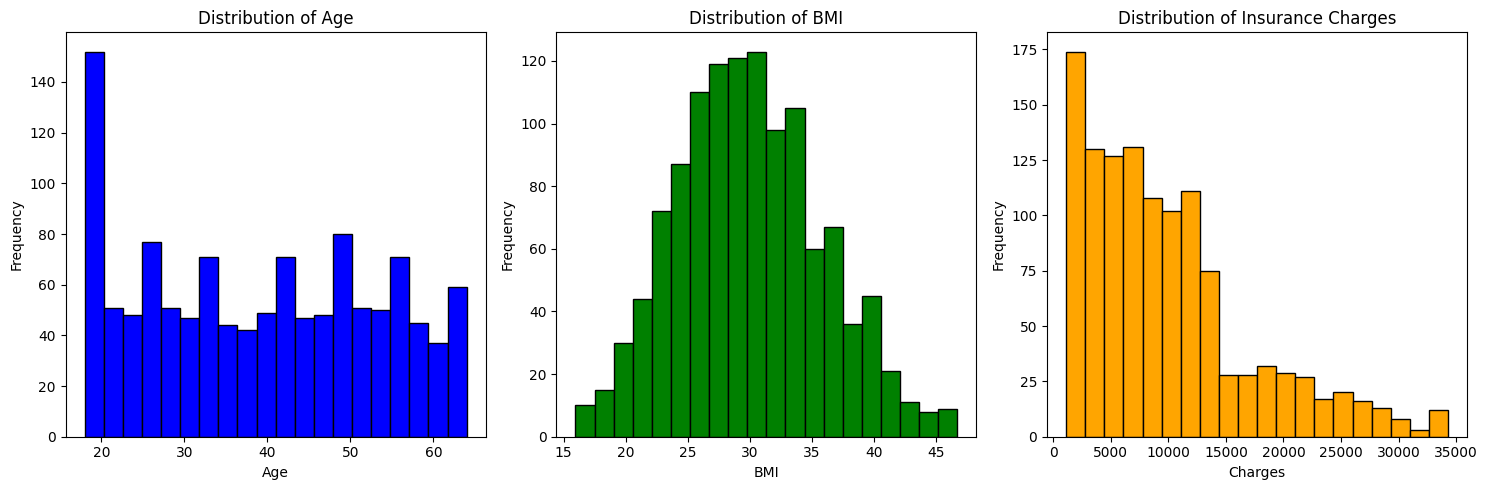

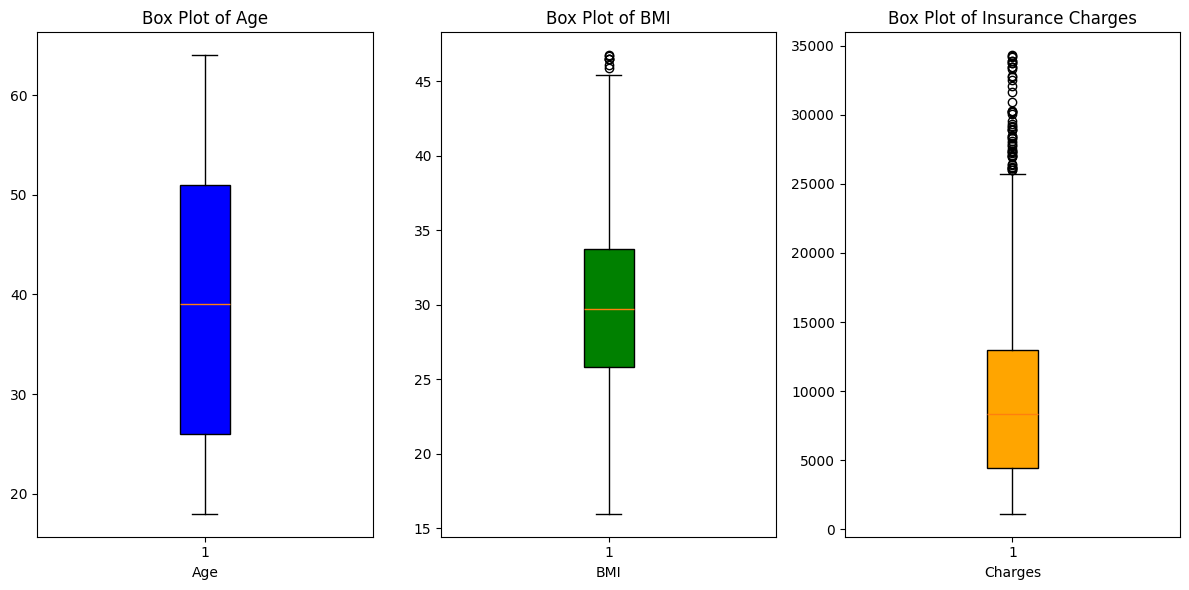

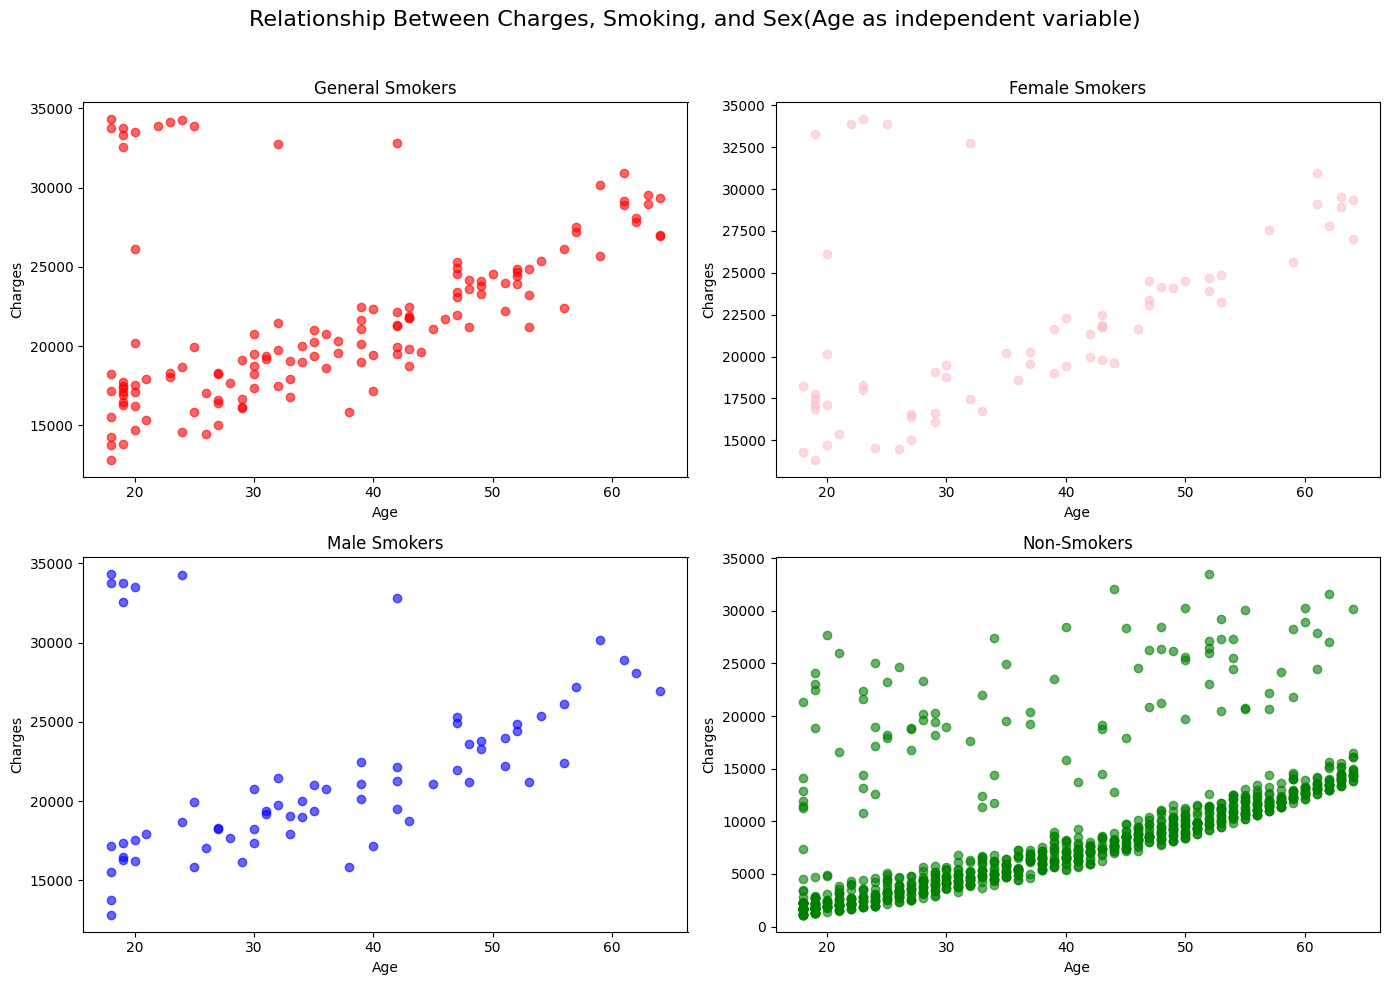

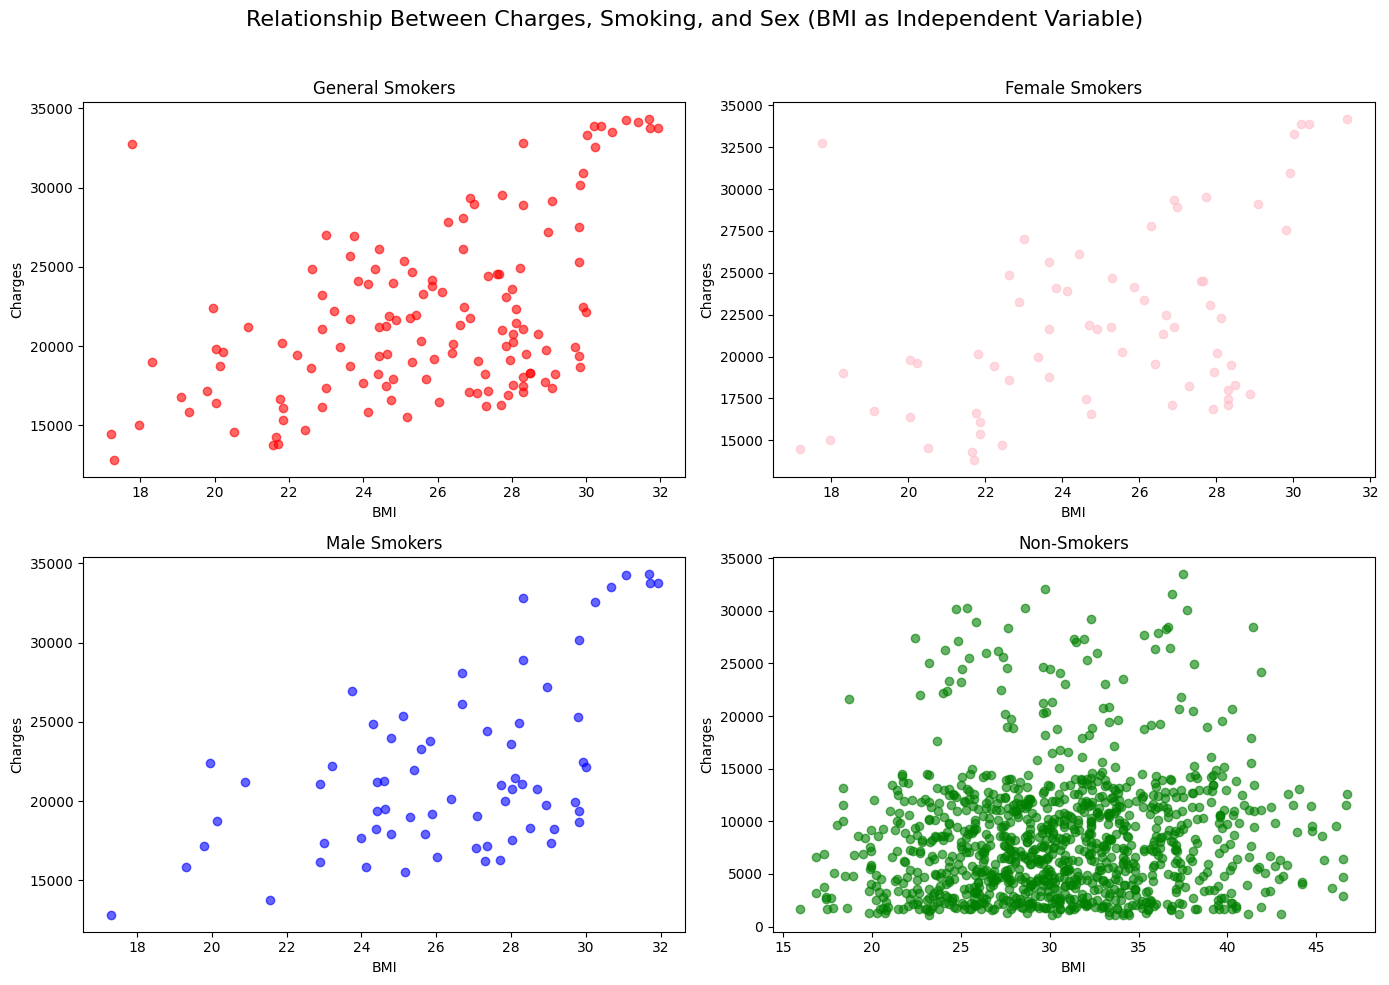

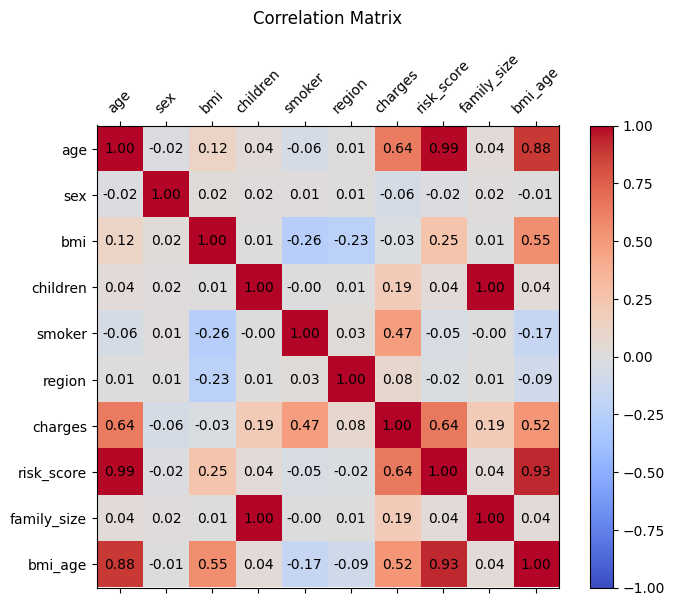

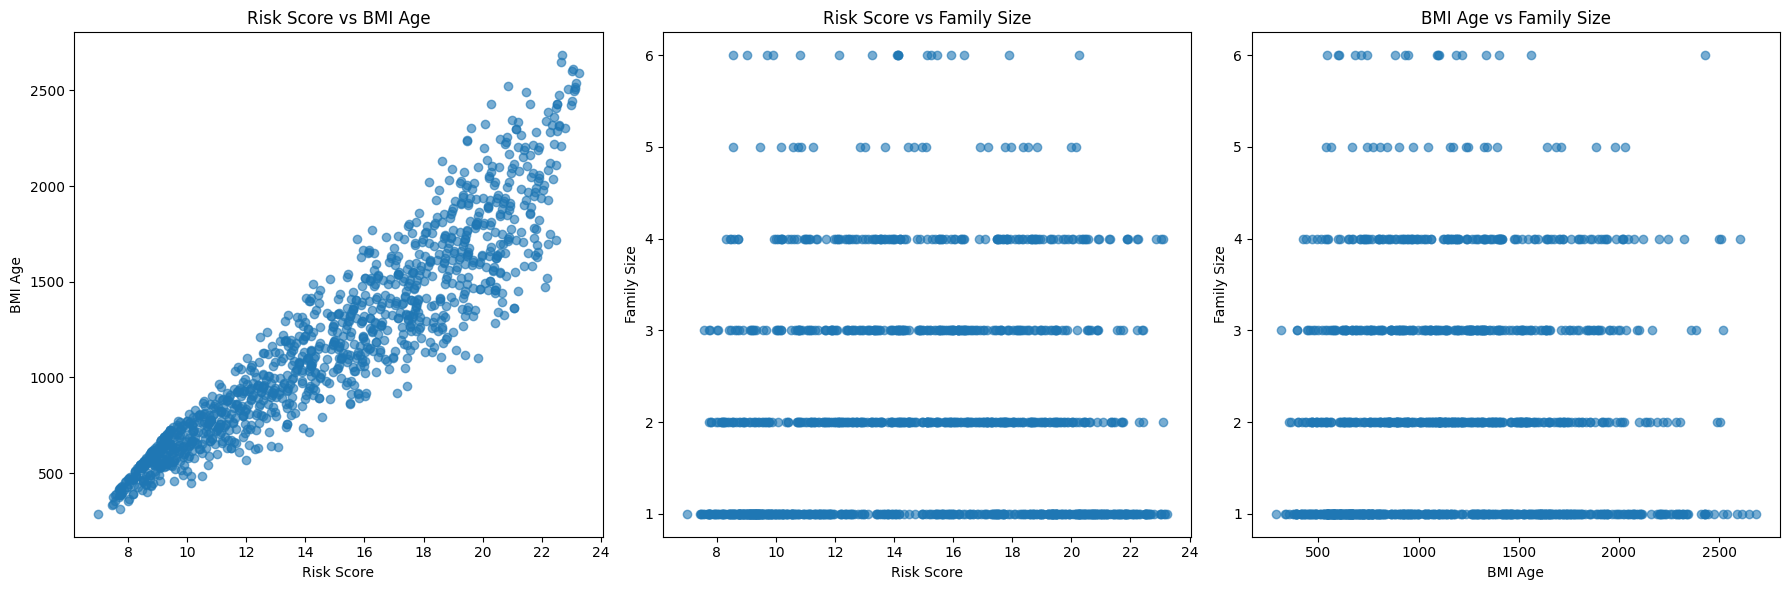

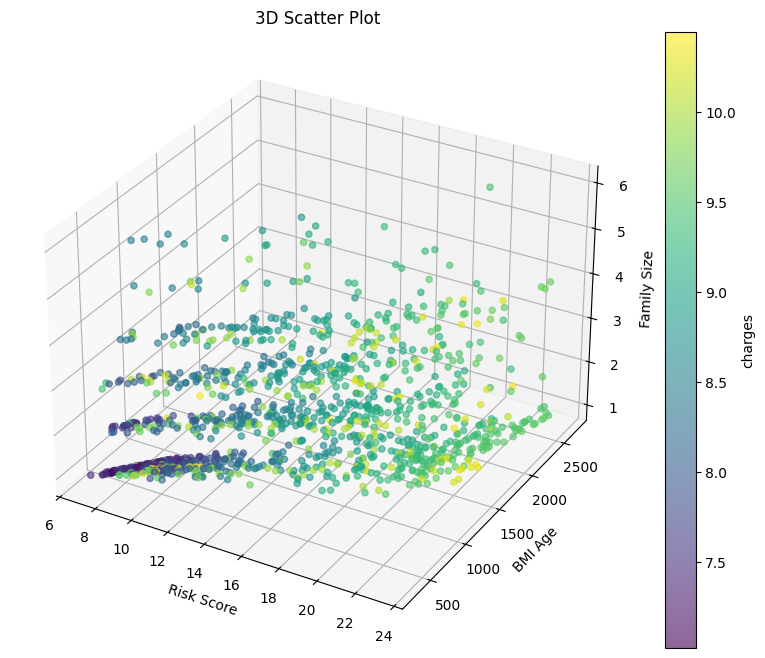

In [30]:



if __name__ == "__main__":
    
    
    df = pd.read_csv('E:\\NumericalMethods\\Project\\DataSet.csv')

    df_cleaned = clean_data(df)
   
    measures_age = compute_measures(df_cleaned, 'age')
    measures_bmi = compute_measures(df_cleaned, 'bmi')
    measures_charges = compute_measures(df_cleaned, 'charges')


    # Create a DataFrame to display the results
    results_table = pd.DataFrame({
        'Variable': ['Age', 'BMI', 'Charges'],
        'Mean': [measures_age['Mean'], measures_bmi['Mean'], measures_charges['Mean']],
        'Median': [measures_age['Median'], measures_bmi['Median'], measures_charges['Median']],
        'Variance': [measures_age['Variance'], measures_bmi['Variance'], measures_charges['Variance']],
        'Standard Deviation': [measures_age['Standard Deviation'], measures_bmi['Standard Deviation'], measures_charges['Standard Deviation']]
    })

    print(results_table)

    histogram(df_cleaned)
    box_plot(df_cleaned)



    # Display the table
    

    
    scatter_plot(df_cleaned)

    df_copy = df_cleaned.copy()

    # Encode categorical variables
    
    preprocessor = preProcessor(df_cleaned)

    preprocessor.log_transform(df_cleaned)
    preprocessor.create_composite_risk_score(df_cleaned)
    preprocessor.family_size(df_cleaned)
    preprocessor.create_composite_bmi_age(df_cleaned)
    X_train, X_test, y_train, y_test = preprocessor.split_data(df_cleaned)

    correlation_matrix(df_cleaned)
    preprocessor.plot_scatter(df_cleaned)
    preprocessor.plot_3d_scatter(df_cleaned)
